In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
import json
from pprint import pprint

#BITCOIN API: url setup
url = 'https://api.coindesk.com/v1/bpi/historical/close.json?'
default = 'start=2020-01-01&end=2020-12-31'

# set start and end date variables
# NOTE: must stay within 2020 range, csv files (dow & gold) are limited to this range
start_date = '2020-01-01'
end_date = '2020-12-31'

# DOW: file to Load, read csv, dataframe
file_to_load = "data/dow.csv"
dow_data = pd.read_csv(file_to_load)
dow_data_df = pd.DataFrame(dow_data)

# GOLD: file to load, read csv, dataframe
file_to_load = "data/gold.csv"
gold_data = pd.read_csv(file_to_load)
gold_data_df = pd.DataFrame(gold_data)
gold_data_df.columns = gold_data_df.columns.tolist()[:1] + ['Close'] + gold_data_df.columns.tolist()[2:]

In [3]:
# BITCOIN: create query url for start and end date, request json
query_url = f'{url}start={start_date}&end={end_date}'
pprint(requests.get(query_url).json())

{'bpi': {'2020-01-01': 7188.4633,
         '2020-01-02': 6961.5683,
         '2020-01-03': 7346.58,
         '2020-01-04': 7355.855,
         '2020-01-05': 7356.3117,
         '2020-01-06': 7761.825,
         '2020-01-07': 8157.7617,
         '2020-01-08': 8042.8733,
         '2020-01-09': 7816.9233,
         '2020-01-10': 8189.265,
         '2020-01-11': 8016.4267,
         '2020-01-12': 8178.8833,
         '2020-01-13': 8105.4783,
         '2020-01-14': 8807.4267,
         '2020-01-15': 8808.4867,
         '2020-01-16': 8716.9133,
         '2020-01-17': 8890.25,
         '2020-01-18': 8901.17,
         '2020-01-19': 8698.5717,
         '2020-01-20': 8631.2883,
         '2020-01-21': 8727.6033,
         '2020-01-22': 8661.01,
         '2020-01-23': 8392.145,
         '2020-01-24': 8436.49,
         '2020-01-25': 8337.1017,
         '2020-01-26': 8602.7417,
         '2020-01-27': 8901.5067,
         '2020-01-28': 9393.2733,
         '2020-01-29': 9290.46,
         '2020-01-30': 9508.72

In [4]:
# BITCOIN: create response, create dataframe of date range results from API
response = requests.get(query_url).json()
my_dict = response['bpi']
test_df = pd.DataFrame(list(my_dict.items()),columns = ['close date','close price']) 

# test_df

In [5]:
# DOW: clean data (take out out-of-range data based on start_/end_date variables above)
# return only date and close price columns
dow_cleaned = dow_data_df.loc[(dow_data_df['Date'] >= start_date) & (dow_data_df['Date'] <= end_date)]
dow_cleaned = dow_cleaned[['Date','Close']]

# rename date column to prep for merge
dow_df = dow_cleaned.rename(columns={'Date':'close date'})

# dow_cleaned

In [6]:
# GOLD: clean data - convert to_datetime
gold_data_df['Date'] = pd.to_datetime(gold_data_df['Date'])

# clean data - take out out-of-range data based on start_/end_date variables above
# return only date and close price columns
gold_cleaned = gold_data_df.loc[(gold_data_df['Date'] >= start_date) & (gold_data_df['Date'] <= end_date)]
gold_cleaned = gold_cleaned.sort_values(by=['Date']).reset_index(drop=True)
gold_cleaned = gold_cleaned.iloc[:,0:2]

# rename date column to prep for merge
gold_df = gold_cleaned.rename(columns={'Date':'close date'})

# gold_df

In [7]:
# BITCOIN & 
merged = pd.merge(test_df, dow_df, on='close date', how='left')
merged['close date'] = pd.to_datetime(merged['close date'])

merged = pd.merge(merged, gold_df, on='close date', how='left', suffixes=('_dow','_gold'))
merged = merged.rename(columns={'close date':'Date','close price':'Bitcoin', 'Close_dow':'Dow', 'Close_gold':'Gold'})

# merged

In [8]:
#drop NaN values (aka weekends & holidays)
merged = merged.dropna()
merged


,Date,Bitcoin,Dow,Gold
1,2020-01-02,6961.5683,28868.800781,1528.1
2,2020-01-03,7346.5800,28634.880859,1549.2
5,2020-01-06,7761.8250,28703.380859,1568.8
6,2020-01-07,8157.7617,28583.679688,1574.3
7,2020-01-08,8042.8733,28745.089844,1560.2
...,...,...,...,...
358,2020-12-24,23729.6483,30199.869141,1883.2
362,2020-12-28,27041.8667,30403.970703,1880.4
363,2020-12-29,27353.9783,30335.669922,1882.9
364,2020-12-30,28886.0400,30409.560547,1893.4


In [9]:
# setting axes to variables
bitcoin_x = merged['Bitcoin']
dow_x = merged['Dow']
gold_x = merged['Gold']
all_y = merged['Date']

In [10]:
# set up colors
color_bit = 'red'
color_dow = 'blue'
color_gold = 'goldenrod'
color_label = 'purple'

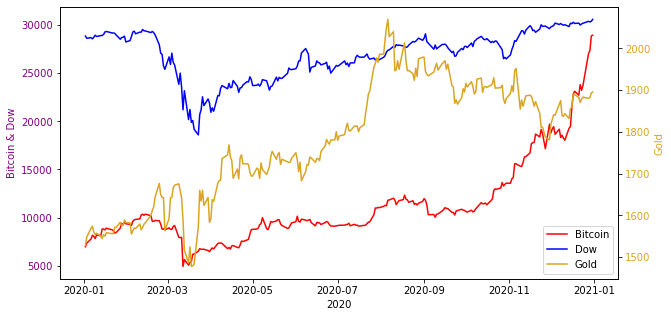

In [11]:
# plot bitcoin and dow on left y-axis
fig, ax1 = plt.subplots()
plot1 = ax1.plot(all_y, bitcoin_x, color=color_bit, label='Bitcoin')
plot2 = ax1.plot(all_y, dow_x, color=color_dow, label='Dow')
ax1.tick_params(axis='y', labelcolor=color_label)
ax1.set_xlabel('2020')
ax1.set_ylabel('Bitcoin & Dow', color=color_label)
ax1.plot()

# set up second y-axis *see link*
ax2 = ax1.twinx()

# plot second y-axis
ax2.set_ylabel('Gold', color=color_gold)
plot3 = ax2.plot(all_y, gold_x, color=color_gold, label= 'Gold')
ax2.tick_params(axis='y', labelcolor=color_gold)

## combining all plots into one legen *see link*
plots = plot1+plot2+plot3
labels = [p.get_label() for p in plots]
ax1.legend(plots, labels, loc=0)

# set fig size for readability *see link*
fig.set_size_inches(10, 5, forward=True)

plt.show()

# here's the link to the info on overlaying two axes: 
# https://matplotlib.org/gallery/api/two_scales.html

# link to combining all plots into one legend:
# https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend

# link to changing fig size
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

In [12]:
merged.describe()

,Bitcoin,Dow,Gold
count,253.000000,253.000000,253.000000
mean,11143.665731,26890.673612,1779.100791
std,4298.440906,2521.704585,142.015038
min,4914.085000,18591.929688,1477.900000
25%,8890.250000,25595.800781,1675.700000
50%,9730.365000,27480.029297,1788.100000
75%,11744.012700,28823.769531,1895.500000
max,28956.265000,30606.480469,2069.400000


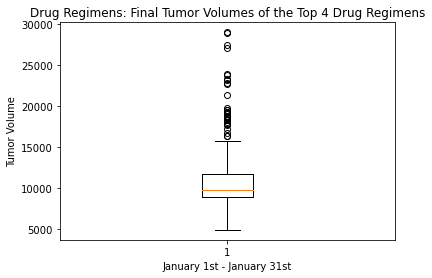

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens: Final Tumor Volumes of the Top 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(merged['Bitcoin'])
plt.xlabel('January 1st - January 31st')
plt.show()

#make data folder outside jupyter notebook

## TO DO:
* Meredith: covid border shut down: february 28-march 26, 2020
* Darren: george floyd/social protests: may 25-june 25, 2020
* Ryan: election: nov 2-nov 9
* Emi: move to Maryland (good luck!)
* Chelsea: year data?


In [14]:
#COVID SECTION: Look between dates 2020-02-28 through 2020-03-26 (Meredith)
start_date = '2020-02-28'
end_date = '2020-03-26'

covid_df = merged.loc[(merged['Date'] >= start_date) & (merged['Date'] <= end_date)]

covid_df

,Date,Bitcoin,Dow,Gold
58,2020-02-28,8715.6617,25409.359375,1564.1
61,2020-03-02,8926.2517,26703.320313,1592.3
62,2020-03-03,8768.1800,25917.410156,1642.1
63,2020-03-04,8767.8867,27090.859375,1643.0
64,2020-03-05,9073.2750,26121.279297,1666.4
65,2020-03-06,9165.1517,25864.779297,1672.4
68,2020-03-09,7944.4500,23851.019531,1675.7
69,2020-03-10,7899.2267,25018.160156,1659.1
70,2020-03-11,7951.1700,23553.220703,1642.3
71,2020-03-12,4914.0850,21200.619141,1590.3


In [15]:
# setting axes to variables
bitcoin_x = covid_df['Bitcoin']
dow_x = covid_df['Dow']
gold_x = covid_df['Gold']
all_y = covid_df['Date']

In [16]:
# set up colors
color_bit = 'red'
color_dow = 'blue'
color_gold = 'goldenrod'
color_label = 'purple'

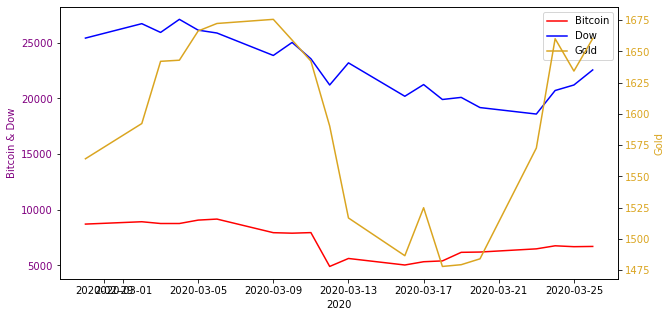

In [17]:
# plot bitcoin and dow on left y-axis
fig, ax1 = plt.subplots()
plot1 = ax1.plot(all_y, bitcoin_x, color=color_bit, label='Bitcoin')
plot2 = ax1.plot(all_y, dow_x, color=color_dow, label='Dow')
ax1.tick_params(axis='y', labelcolor=color_label)
ax1.set_xlabel('2020')
ax1.set_ylabel('Bitcoin & Dow', color=color_label)
ax1.plot()

# set up second y-axis *see link*
ax2 = ax1.twinx()

# plot second y-axis
ax2.set_ylabel('Gold', color=color_gold)
plot3 = ax2.plot(all_y, gold_x, color=color_gold, label= 'Gold')
ax2.tick_params(axis='y', labelcolor=color_gold)

## combining all plots into one legen *see link*
plots = plot1+plot2+plot3
labels = [p.get_label() for p in plots]
ax1.legend(plots, labels, loc=0)

# set fig size for readability *see link*
fig.set_size_inches(10, 5, forward=True)

plt.show()


In [18]:
covid_df.describe()
# for Covid dates

,Bitcoin,Dow,Gold
count,20.000000,20.000000,20.000000
mean,7129.578345,22877.559863,1592.225000
std,1474.355594,2740.331625,73.303212
min,4914.085000,18591.929688,1477.900000
25%,6042.596675,20575.812500,1522.850000
50%,6738.365850,22868.894532,1613.300000
75%,8728.717950,25523.214356,1659.375000
max,9165.151700,27090.859375,1675.700000


##Leaving Room for Darren's stuff - Ryan

## Election Data '11-01-2020' - '11-14-2020'

In [19]:
##Set dates for election.  Used 2 weeks due to delayed election results
start_date = '11-01-2020'
end_date = '11-14-2020'

election_df = merged.loc[(merged['Date'] >= start_date) & (merged['Date'] <= end_date)]
election_df

,Date,Bitcoin,Dow,Gold
306,2020-11-02,13567.2233,26925.050781,1892.5
307,2020-11-03,14030.7900,27480.029297,1910.4
308,2020-11-04,14158.8100,27847.660156,1896.2
309,2020-11-05,15593.5550,28390.179688,1946.8
310,2020-11-06,15589.0033,28323.400391,1951.7
313,2020-11-09,15334.8700,29157.970703,1854.4
314,2020-11-10,15313.4433,29420.919922,1876.4
315,2020-11-11,15706.5400,29397.630859,1861.6
316,2020-11-12,16301.0267,29080.169922,1873.3
317,2020-11-13,16330.3433,29479.810547,1886.2


In [20]:
# setting axes to variables for 
bitcoin_x = election_df['Bitcoin']
dow_x = election_df['Dow']
gold_x = election_df['Gold']
all_y = election_df['Date']

The hypothesis is that bitcoin would behave like a hedge asset such as gold during economic uncertainty.  One would interpret that Gold/Bitcoin prices would increase during uncertainty leading up to the election and level off as confidence was restored in the market once a president was elected. 

In [21]:
#Settting variables for % change
percent_dow = dow_x.pct_change()
percent_dow
percent_bitcoin = bitcoin_x.pct_change()
percent_bitcoin
percent_gold = gold_x.pct_change()
percent_gold

#adding to DF
election_df['% Chg Dow'] = percent_dow
election_df.head()

election_df['% Chg Bitcoin'] = percent_bitcoin
election_df.head()

election_df['% Chg Gold'] = percent_gold 
election_df.head(10)

election_df.fillna(0)

<ipython-input-21-97a465369f71>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_df['% Chg Dow'] = percent_dow
<ipython-input-21-97a465369f71>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_df['% Chg Bitcoin'] = percent_bitcoin
<ipython-input-21-97a465369f71>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,Date,Bitcoin,Dow,Gold,% Chg Dow,% Chg Bitcoin,% Chg Gold
306,2020-11-02,13567.2233,26925.050781,1892.5,0.000000,0.000000,0.000000
307,2020-11-03,14030.7900,27480.029297,1910.4,0.020612,0.034168,0.009458
308,2020-11-04,14158.8100,27847.660156,1896.2,0.013378,0.009124,-0.007433
309,2020-11-05,15593.5550,28390.179688,1946.8,0.019482,0.101332,0.026685
310,2020-11-06,15589.0033,28323.400391,1951.7,-0.002352,-0.000292,0.002517
313,2020-11-09,15334.8700,29157.970703,1854.4,0.029466,-0.016302,-0.049854
314,2020-11-10,15313.4433,29420.919922,1876.4,0.009018,-0.001397,0.011864
315,2020-11-11,15706.5400,29397.630859,1861.6,-0.000792,0.025670,-0.007887
316,2020-11-12,16301.0267,29080.169922,1873.3,-0.010799,0.037850,0.006285
317,2020-11-13,16330.3433,29479.810547,1886.2,0.013743,0.001798,0.006886


To normalize the Data to test against P-values, we calculated the % change among Bitcoin/Dow/Gold

F_onewayResult(statistic=2.477190473682874, pvalue=0.13507226312302117)
^Bitcoin against Gold
F_onewayResult(statistic=0.80418009501826, pvalue=0.3831413643210435)
^Bitcoin against Dow


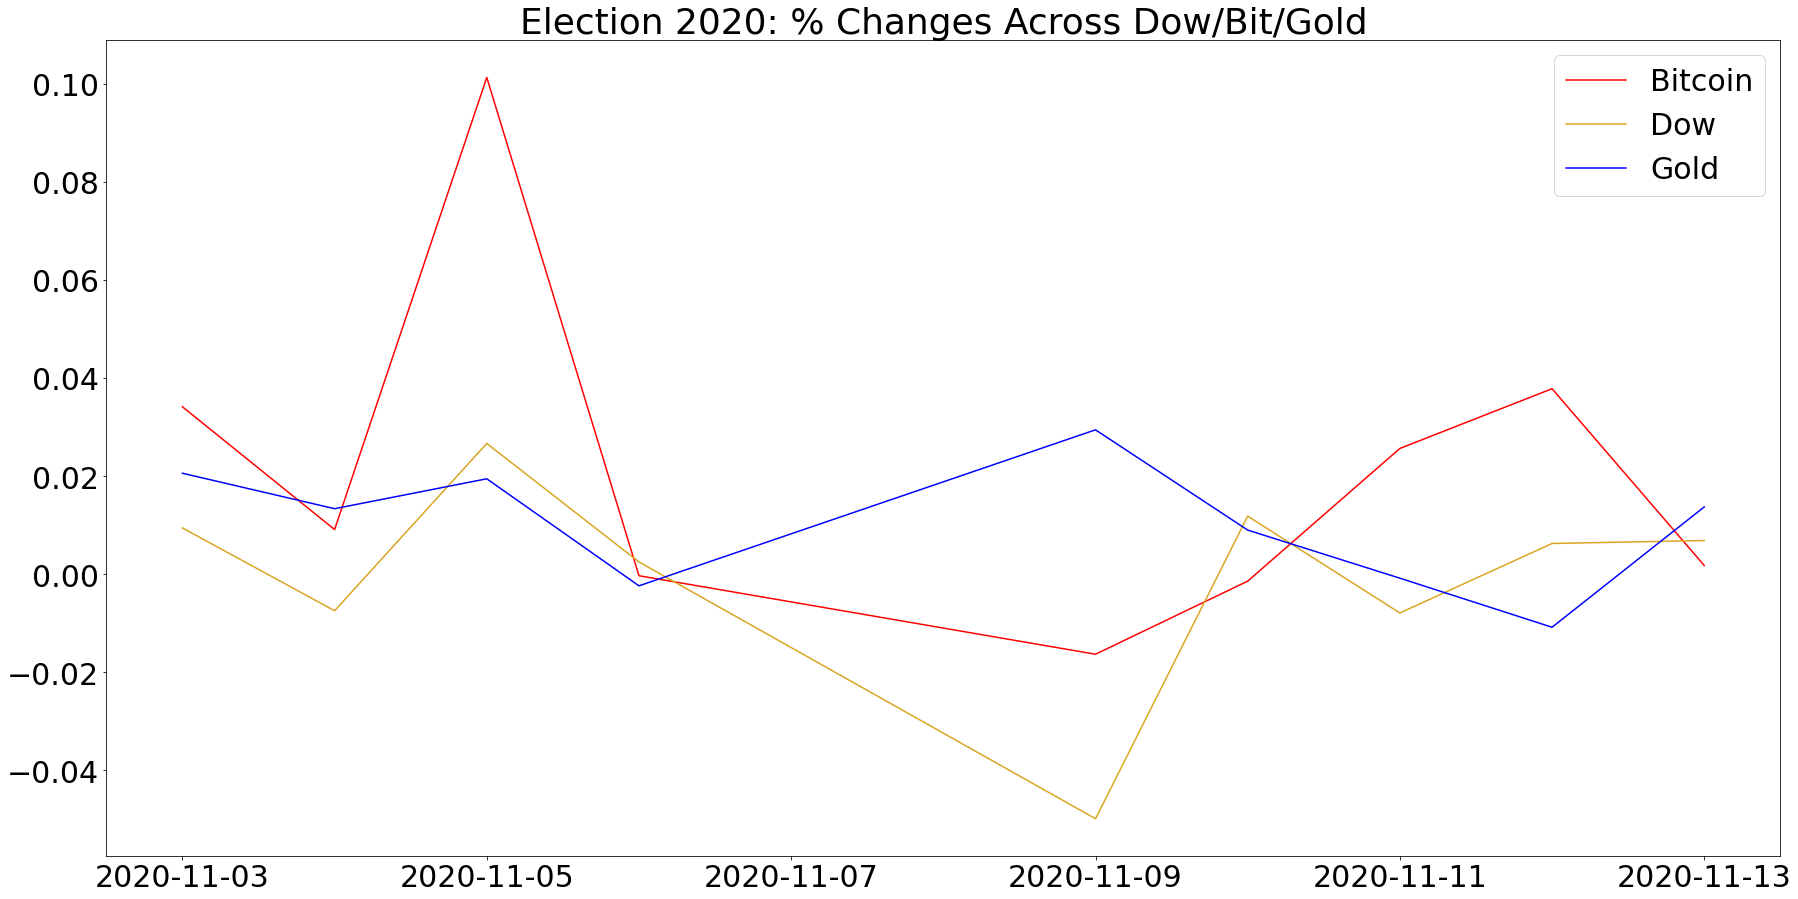

In [27]:
#Anova Test 
group_dow = election_df['% Chg Dow'].dropna()
group_gold = election_df['% Chg Gold'].dropna()
group_bitcoin = election_df['% Chg Bitcoin'].dropna()
print(stats.f_oneway(group_bitcoin, group_gold))
print('^Bitcoin against Gold')
print(stats.f_oneway(group_bitcoin, group_dow))
print('^Bitcoin against Dow')

#Plotting % chg
Bitcoin = plt.plot(all_y, election_df['% Chg Bitcoin'], color="red", label="Bitcoin")
Gold = plt.plot(all_y, election_df['% Chg Gold'], color = "goldenrod", label = "Gold")
Dow = plt.plot(all_y,  election_df['% Chg Dow'], color = "blue", label = "Dow")
plt.title("Election 2020: % Changes Across Dow/Bit/Gold")
plt.rcParams["figure.figsize"] = (30,15)
plt.rcParams.update({'font.size': 30})
plt.legend(labels)

Comparing the sample election data sets for each variable failed the hypothesis for all p-values..  The lower p-value was associated with Bitcoin and Gold. This was likely due to a small sampling of dates. However, the % change behavior shows that Bitcoin and Gold rose drastically during the timeframe where a President had not been called (11/4 - 11/5).  There was a marked decrease in Bitcoin and Gold prices once the President was called over the weekend (Major News outlet called Biden's presidency on 11/7) while the Dow rose, this behavior would be in line that Bitcoin was reacting as a type of hedge asset. 

In [ ]:
# set up colors
color_bit = 'red'
color_gold = 'goldenrod'

In [ ]:
# Plotting gold 

Gold = plt.plot(all_y, gold_x, color=color_gold, label="Gold")
fig.set_size_inches(10, 5, forward=True)
plt.title("Election 2020: Gold")
plt.rcParams["figure.figsize"] = (30,15)
plt.rcParams.update({'font.size': 30})

In [ ]:
#Simple Bitcoin Plot
Bitcoin = plt.plot(all_y, bitcoin_x, color=color_bit, label="Bitcoin")
plt.title("Election 2020: Bitcoin")
plt.rcParams["figure.figsize"] = (30,15)
plt.rcParams.update({'font.size': 30})

Bitcoin rose during uncertainty leading up to the election and fell somewhat soon after Biden was elected = Same as Gold.  This could be interpreted that it was behaving as a hedge investment and there was positive sentiment in the market once a President was declared.  However, Bitcoin did quickly recover and had a general positive correlation like the Dow. This could indicate that there was positive sentiment with Bitcoin and a Progressive administration. 